<a href="https://colab.research.google.com/github/Alumno-85/ESTADISTICA/blob/main/M2_AI1_BernalFranklin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
# EJERCICIO 1.  Indica el número total de observaciones y variables totales en el dataset. Calcula el número de nulos de cada variable. ¿Qué aporta esta información? (10%)

# URL del archivo CSV
url = 'https://raw.githubusercontent.com/Alumno-85/ESTADISTICA/main/precio_gasolina.csv'

# Cargar el archivo CSV en un DataFrame, especificando el separador ';' y el decimal ','
df = pd.read_csv(url, sep=';', decimal=',')

# Transformó la columna 'Toma_de_datos' y 'Fecha_extracción' al tipo de datos de fecha y hora en vista que al cargar el archivo estaba como object
df['Toma_de_datos'] = pd.to_datetime(df['Toma_de_datos'], format='%d %m %Y %H%M')
df['Fecha_extraccion'] = pd.to_datetime(df['Fecha_extraccion'])

# Número total de observaciones y variables
num_observaciones, num_variables = df.shape
print("Número total de observaciones:", num_observaciones)
print("Número total de variables:", num_variables)

# Número de valores nulos por variable
nulos_por_variable = df.isnull().sum()
print("\nNúmero de valores nulos por variable:")
print(nulos_por_variable)

# Calcular el número total de valores nulos en todas las variables
nulos_totales = nulos_por_variable.sum()

# Calcular el porcentaje de valores nulos en relación al total de observaciones
porcentaje_nulos = (nulos_totales / num_observaciones) * 100

# Visualiza % de datos nulos
print(f"  En este caso, {porcentaje_nulos:.2f}% de los datos son nulos.")

Número total de observaciones: 9991
Número total de variables: 13

Número de valores nulos por variable:
Provincia             0
Localidad             0
Codigo_postal         0
Direccion             0
Margen                0
Toma_de_datos         0
Precio                0
Rotulo                1
Tipo_venta            0
Rem                   0
Horario               0
Tipo_servicio       146
Fecha_extraccion      0
dtype: int64
  En este caso, 1.47% de los datos son nulos.


**EXPLICACION:** Esta información me aporta dimensionamiento de la base en cuanto al tamaño, complejidad, y variabilidad.

Con respecto a los valores nulos, me alerta sobre la integridad de la información, los problemas futuros que pueda tener.

En este caso, los datos nulos al ser el 1.47% de la data en una sola variable es totalmente manejable para el estudio considerando que siempre hay un margen de error +/- que dependendiendo del análisis he visto que fluctúa de hast un +/- 5%

In [61]:
# EJERCICIO 2. Identifica el tipo de variables a nivel estadístico que corresponden cada una del dataset. Debes explicar el motivo por el cual haces dicha clasificación. (30%)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         9991 non-null   object        
 1   Localidad         9991 non-null   object        
 2   Codigo_postal     9991 non-null   int64         
 3   Direccion         9991 non-null   object        
 4   Margen            9991 non-null   object        
 5   Toma_de_datos     9991 non-null   datetime64[ns]
 6   Precio            9991 non-null   float64       
 7   Rotulo            9990 non-null   object        
 8   Tipo_venta        9991 non-null   object        
 9   Rem               9991 non-null   object        
 10  Horario           9991 non-null   object        
 11  Tipo_servicio     9845 non-null   object        
 12  Fecha_extraccion  9991 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 1014.8+ KB

**Provincia:** recoge el nombre de una Provincia del Pais España, por tanto es una variable cualitativa nominal"

**Localidad:** recoge el nombre de una  Localidad de la Provincia, por tanto es una variable cualitativa nominal"

**Codigo_postal:** es la identificación de un lugar, si bien la información se recogió de forma numérica, esto no implica que pueda hacer cálculos, por tanto es una variable cualitativa categórica"

**Dirección:**recoge el nombre de una dirección , por tanto es una variable cualitativa nominal"

**Margen:**recoge en que lado de la via se encuentra la gasolinera, por tanto es una variable cualitativa nominal"

**Toma_de_datos:** recoge la fecha en que fue tomada la información, la variable en el archivo original venía como tipo de variable object, tuve que transformarla datetime64[ns] para un mejor análisis, no en esta práctica pero servirá para un futuro ejercicio, Es una variable contínua, además con el formato transformado puedo hacer cálculos entre toma y toma o que tiempo ha transcurrido entre la última toma de datos y hoy, etc." (Chunk 2.1)

**Precio:** recoge el precio del combustible, son valores divisibles, se puede medir, por tanto es una variable Contínua", tambíen se tuvo que transformar el dato para que reconozca el separador decimal ','. (Chunk 2.1)

**Rotulo:** recoge la marca de la Gasolinera, no interesa el orden, por tanto es una variable cualitativa nominal"

**Tipo_venta:** aunque en la practica nos muestra solo dos PyR, dándonos una primera idea que era dicotómica, sin embargo tenemos más categorías como lo muestro en el (Chunk 2.2), busque en Geoportal alguna segementación de esta variable para tratarla como rdinal, no la encontre, por tanto es una variable cualitativa nominal"

**Rem**: recoge datos de donde proviene la información si del Mayorista o Minorista, según la data ambas fuentes son igualmente significativas por tanto es Dicotómica Simétrica"

**Horario:** recoge el horario de atención de las gasolineras, por tanto es una variabe cualitativa nominal"

**Tipo_Servicio:** recoge de como es o se atiende el cliente en la gasolinera, veo que en el Dataframe se concatena de acuerdo al horario (chunk 2.1), pero cada estación tiene su tipo de servicio no hay ningún orden ni patrón, por tanto es una variabe cualitativa nominal"

**Fecha_extraccion:** recoge la fecha extracción, la transfomé datetime64[ns] para un mejor análisis aunque no en esta práctica pero para un furturo, Es una variable contínua, al igual que Toma_de_datos si podríamos hacer cálculos, se pueden medir tiempos.

In [17]:
#2.1 Resumen de información de variables, previmente se delimitó el delimitador ; y en separador decimal ","el chunk anterior, en vista que estaba considerando al precio de la gasolina como object
df.head()

,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,2020-08-01 13:53:00,0.758,PCAN,P,dm,LD 24H,LD 24H A,2020-01-08
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,2020-08-01 09:00:00,0.759,OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,2020-01-08
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,2020-07-27 12:02:00,0.769,GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,2020-01-08
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,2020-07-29 00:00:00,0.789,TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,2020-01-08
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,2020-07-27 11:59:00,0.789,GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,2020-01-08


In [8]:
# 2.2  Sustento de que hay mas de dos opciones
conteo_tomas_por_tipo_venta = df.groupby(['Tipo_venta'])['Tipo_venta'].count()

# Ordenar el resultado de mayor a menor
conteo_tomas_por_tipo_venta = conteo_tomas_por_tipo_venta.sort_values(ascending=False)

# Mostrar el resultado
print("Número de tomas por Tipo_venta (ordenado de mayor a menor):")
print(conteo_tomas_por_tipo_venta)

Número de tomas por Tipo_venta (ordenado de mayor a menor):
Tipo_venta
P    9772
R     168
A      43
p       6
N       2
Name: Tipo_venta, dtype: int64


Tabla de frecuencias para 'Provincia' (ordenada de menor a mayor frecuencia):
                 Provincia  Frecuencia Frecuencia Acumulada  \
0                    CEUTA           9                    9   
1                  MELILLA          13                   22   
2                    SORIA          36                   58   
3              ARABA ALAVA          61                  119   
4                    AVILA          62                  181   
5                 PALENCIA          62                  243   
6                   TERUEL          62                  305   
7                RIOJA LA           70                  375   
8                  SEGOVIA          71                  446   
9                   ZAMORA          73                  519   
10                 OURENSE          80                  599   
11             GUADALAJARA          80                  679   
12               SALAMANCA          96                  775   
13                  HUESCA         104  

<ipython-input-18-c893633a428b>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tabla_frecuencias['Provincia'][:-1], y=tabla_frecuencias['Frecuencia'][:-1], palette='viridis')


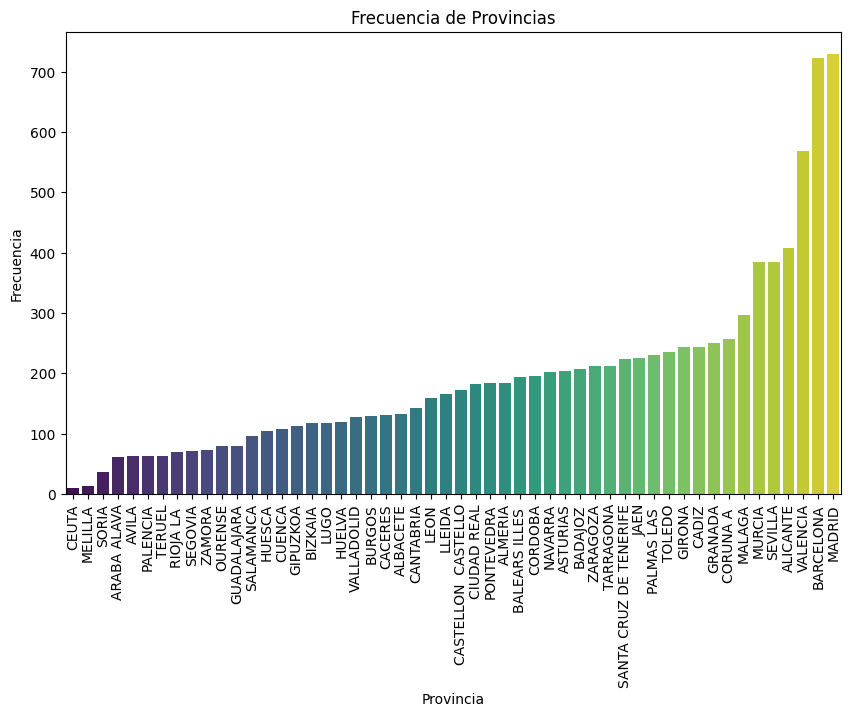

In [18]:
# 3. Crear una tabla de frecuencias y el gráfico correspondiente para cada una de las variables siguientes: provincia, margen y precio
# 3.1 PROVINCIA
import matplotlib.pyplot as plt
import seaborn as sns

# Tabla de frecuencias para 'Provincia'
frecuencia_provincia = df['Provincia'].value_counts()

# Ordenar la tabla de frecuencias de menor a mayor frecuencia
frecuencia_provincia = frecuencia_provincia.sort_values()

# Calcular la frecuencia acumulada correctamente
frecuencia_acumulada = frecuencia_provincia.cumsum()

# Calcular la frecuencia relativa
frecuencia_relativa = frecuencia_provincia / len(df)

# Calcular la frecuencia relativa acumulada
frecuencia_relativa_acumulada = frecuencia_acumulada / len(df)

# Crear un DataFrame con todas las frecuencias
tabla_frecuencias = pd.DataFrame({
    'Provincia': frecuencia_provincia.index,
    'Frecuencia': frecuencia_provincia.values,
    'Frecuencia Acumulada': frecuencia_acumulada.values,
    'Frecuencia Relativa': frecuencia_relativa.values,
    'Frecuencia Relativa Acumulada': frecuencia_relativa_acumulada.values
})

# Añadir la fila de totales
totales = pd.DataFrame({
    'Provincia': ['Total'],
    'Frecuencia': [frecuencia_provincia.sum()],
    'Frecuencia Acumulada': [''],
    'Frecuencia Relativa': [frecuencia_relativa.sum()],
    'Frecuencia Relativa Acumulada': ['']
})

tabla_frecuencias = pd.concat([tabla_frecuencias, totales], ignore_index=True)

# Imprimir la tabla de frecuencias ordenada
print("Tabla de frecuencias para 'Provincia' (ordenada de menor a mayor frecuencia):")
print(tabla_frecuencias)

# Gráfico de barras para 'Provincia' (ordenado de menor a mayor frecuencia)
plt.figure(figsize=(10, 6))
sns.barplot(x=tabla_frecuencias['Provincia'][:-1], y=tabla_frecuencias['Frecuencia'][:-1], palette='viridis')
plt.title('Frecuencia de Provincias')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


**3.1 PROVINCIA:** Al tratarse de una variable cualitativa nominal tengo que darle el tratamiento de datos no agrupados por tanto, elaboro una tabla de frecuencias ordenando de menor a mayor y haciendo el conteo de cuantas observaciones tiene cada Provincia. A su vez el gráfico es uno de barras por tratarse de datos cualitativos.

Tabla de frecuencias para 'Margen' (ordenada de menor a mayor frecuencia):
  Margen  Frecuencia Frecuencia Acumulada  Frecuencia Relativa  \
0      N        2379                 2379             0.238114   
1      I        2596                 4975             0.259834   
2      D        5016                 9991             0.502052   
3  Total        9991                                  1.000000   

  Frecuencia Relativa Acumulada  
0                      0.238114  
1                      0.497948  
2                           1.0  
3                                


<ipython-input-13-b8a922f5f65f>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tabla_frecuencias['Margen'][:-1], y=tabla_frecuencias['Frecuencia'][:-1], palette='viridis')


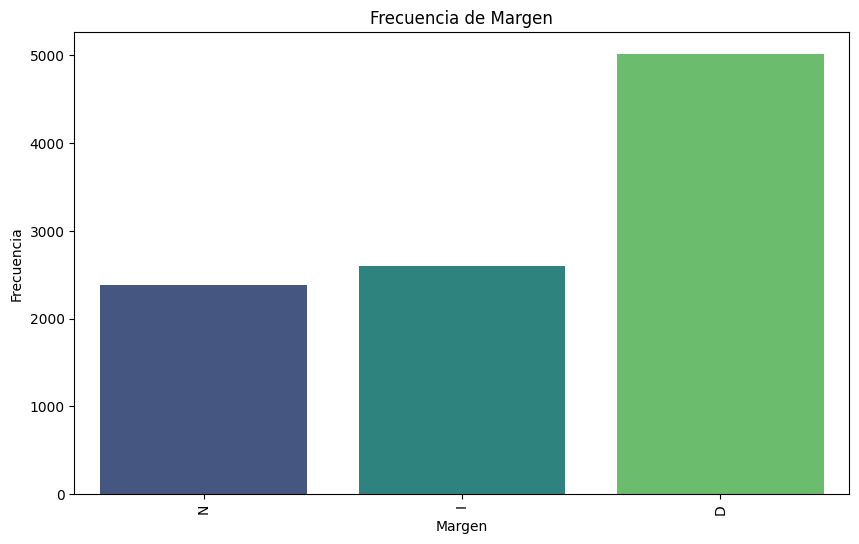

In [13]:
# 3. Crear una tabla de frecuencias y el gráfico correspondiente para cada una de las variables siguientes: provincia, margen y precio
# 3.2 MARGEN
import matplotlib.pyplot as plt
import seaborn as sns

# Tabla de frecuencias para 'Margen'
frecuencia_margen = df['Margen'].value_counts()

# Ordenar la tabla de frecuencias de menor a mayor frecuencia
frecuencia_margen = frecuencia_margen.sort_values()

# Calcular la frecuencia acumulada correctamente
frecuencia_acumulada = frecuencia_margen.cumsum()

# Calcular la frecuencia relativa
frecuencia_relativa = frecuencia_margen / len(df)

# Calcular la frecuencia relativa acumulada
frecuencia_relativa_acumulada = frecuencia_acumulada / len(df)

# Crear un DataFrame con todas las frecuencias
tabla_frecuencias = pd.DataFrame({
    'Margen': frecuencia_margen.index,
    'Frecuencia': frecuencia_margen.values,
    'Frecuencia Acumulada': frecuencia_acumulada.values,
    'Frecuencia Relativa': frecuencia_relativa.values,
    'Frecuencia Relativa Acumulada': frecuencia_relativa_acumulada.values
})

# Añadir la fila de totales
totales = pd.DataFrame({
    'Margen': ['Total'],
    'Frecuencia': [frecuencia_margen.sum()],
    'Frecuencia Acumulada': [''],
    'Frecuencia Relativa': [frecuencia_relativa.sum()],
    'Frecuencia Relativa Acumulada': ['']
})

tabla_frecuencias = pd.concat([tabla_frecuencias, totales], ignore_index=True)

# Imprimir la tabla de frecuencias ordenada
print("Tabla de frecuencias para 'Margen' (ordenada de menor a mayor frecuencia):")
print(tabla_frecuencias)

# Gráfico de barras para 'Margen' (ordenado de menor a mayor frecuencia)
plt.figure(figsize=(10, 6))
sns.barplot(x=tabla_frecuencias['Margen'][:-1], y=tabla_frecuencias['Frecuencia'][:-1], palette='viridis')
plt.title('Frecuencia de Margen')
plt.xlabel('Margen')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


**3.2 MARGEN:** Tiene el mismo tratamiento que Provincia, al tratarse de una variable cualitativa nominal tengo que darle el tratamiento de datos no agrupados por tanto, elaboro una tabla de frecuencias ordenando de menor a mayor y haciendo el conteo de cuantas observaciones tiene cada Margen. A su vez el gráfico es uno de barras por tratarse de datos cualitativos.

Tabla de frecuencias:
             Intervalo Marca de Clase  Frecuencia  Frecuencia Acumulada  \
0     (0.758, 0.80729]       0.782645           6                     6   
1   (0.80729, 0.85657]        0.83193          29                    35   
2   (0.85657, 0.90586]       0.881215         112                   147   
3   (0.90586, 0.95514]         0.9305          86                   233   
4   (0.95514, 1.00443]       0.979785         240                   473   
5   (1.00443, 1.05371]        1.02907         456                   929   
6     (1.05371, 1.103]       1.078355        1122                  2051   
7     (1.103, 1.15229]       1.127645        1429                  3480   
8   (1.15229, 1.20157]        1.17693        3721                  7201   
9   (1.20157, 1.25086]       1.226215        2543                  9744   
10  (1.25086, 1.30014]         1.2755         241                  9985   
11  (1.30014, 1.34943]       1.324785           4                  9989   
12 

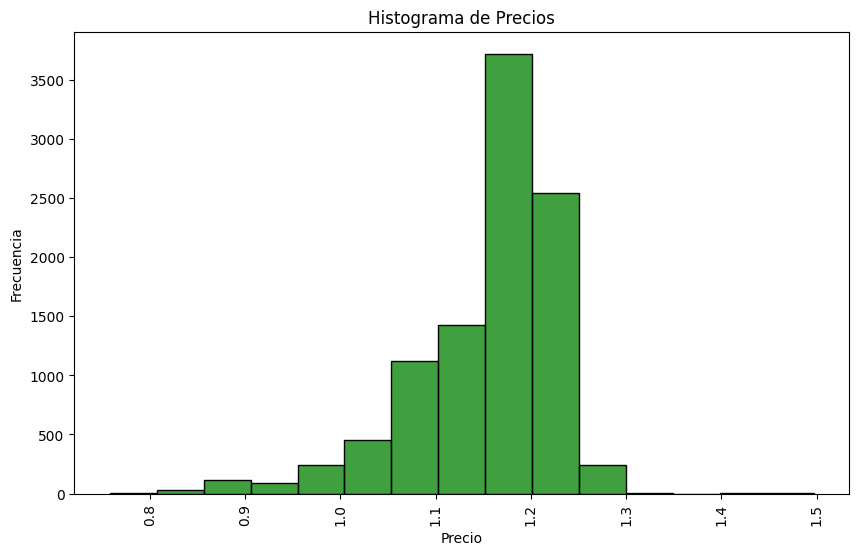

In [83]:
# 3. Crear una tabla de frecuencias y el gráfico correspondiente para cada una de las variables siguientes: provincia, margen y precio
# 3.3 PRECIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular el número de intervalos usando la regla de Sturges
N = len(df)
k = 1 + 3.22 * np.log10(N)
k = int(np.round(k))

# Definir los límites de los intervalos con 6 decimales
limite_inferior = np.round(df['Precio'].min(), 6)
limite_superior = np.round(df['Precio'].max(), 6)
rango = limite_superior - limite_inferior
amplitud = rango / k

# Generar los intervalos con 5 decimales
bins = np.round(np.arange(limite_inferior, limite_superior + amplitud, amplitud), 5)

# Crear la tabla de frecuencias
frecuencia, bins = np.histogram(df['Precio'], bins=bins)
frecuencia_acumulada = np.cumsum(frecuencia)
frecuencia_relativa = frecuencia / N
frecuencia_relativa_acumulada = np.cumsum(frecuencia_relativa)

# Calcular la marca de clase
marca_clase = (bins[:-1] + bins[1:]) / 2

# Crear el DataFrame de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Intervalo': pd.IntervalIndex.from_breaks(bins).astype(str),
    'Marca de Clase': marca_clase,
    'Frecuencia': frecuencia,
    'Frecuencia Acumulada': frecuencia_acumulada,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Relativa Acumulada': frecuencia_relativa_acumulada
})

# Añadir la fila de totales
totales = pd.DataFrame({
    'Intervalo': ['Total'],
    'Marca de Clase': [''],
    'Frecuencia': [frecuencia.sum()],
    'Frecuencia Acumulada': [frecuencia_acumulada[-1]],
    'Frecuencia Relativa': [frecuencia_relativa.sum()],
    'Frecuencia Relativa Acumulada': [frecuencia_relativa_acumulada[-1]]
})

tabla_frecuencias = pd.concat([tabla_frecuencias, totales], ignore_index=True)

# Imprimir la tabla de frecuencias
print("Tabla de frecuencias:")
print(tabla_frecuencias)

# Graficar el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio'], bins=bins, kde=False, color='green')
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

**3.3. PRECIO:** En este caso estoy tratando con una variable cuantitativa contínua, por tanto es necesario agrupar datos y realizar determinar el número de intervalos de acuerdo al total de la base aplicando la regla de Sturges 1+3.22*log(N), determinar límite inferior, límite superior, la marca de clase, el rango y la amplitud.

Para el gráfico al ser datos agrupados con variable contínua el idóneo es un histograma de frecuencias.